In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# budget = pd.read_csv("TB_budget_2024-02-12.csv")
expenditure = pd.read_csv("data/TB_expenditure_utilisation_2024-02-21.csv")
burden = pd.read_csv("data/TB_burden_countries_2024-02-12.csv")
outcome = pd.read_csv("data/TB_outcomes_2024-02-12.csv")
rr_burden = pd.read_csv("data/MDR_RR_TB_burden_estimates_2024-02-12.csv")

In [19]:
rr_burden = rr_burden[['country', 'year',  "e_rr_pct_new", "e_rr_pct_ret", 'source_rr_new', "source_rr_ret"]]

In [20]:
burden = burden[['country', 'year', 'e_inc_num']]

In [21]:
outcome = outcome[['country', 'year', 'c_new_tsr', 'mdr_coh', 'mdr_succ']]

In [22]:
expenditure = expenditure[['country', 'year', "exp_cpp_dstb", "exp_cpp_mdr", "exp_fld", "exp_sld",
                        "exp_lab", "exp_mdrmgt","exp_orsrvy","exp_oth",
                        "exp_patsup","exp_prog","exp_staff"]]

In [25]:
merged = expenditure.merge(burden, on=['country', 'year'])
merged = merged.merge(rr_burden, on=['country', 'year'])
merged = merged.merge(outcome, on=['country', 'year'])
merged['c_tsr_resist'] = 100 * merged['mdr_succ']/merged['mdr_coh']

<BarContainer object of 2 artists>

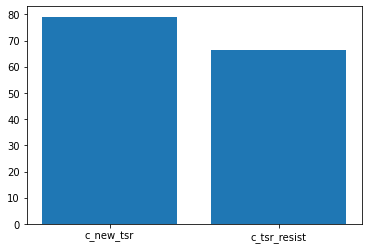

In [38]:
plt.bar(['c_new_tsr','c_tsr_resist'], merged[['c_new_tsr','c_tsr_resist']].mean())

In [39]:
merged["year"].value_counts()

2017    215
2018    215
2019    215
2020    215
2021    215
Name: year, dtype: int64

In [40]:
merged.describe()

,year,exp_cpp_dstb,exp_cpp_mdr,exp_fld,exp_sld,exp_lab,exp_mdrmgt,exp_orsrvy,exp_oth,exp_patsup,exp_prog,exp_staff,e_inc_num,e_rr_pct_new,e_rr_pct_ret,c_new_tsr,mdr_coh,mdr_succ,c_tsr_resist
count,1075.000000,5.180000e+02,5.130000e+02,5.140000e+02,5.060000e+02,5.000000e+02,4.770000e+02,4.650000e+02,4.570000e+02,4.800000e+02,4.840000e+02,5.010000e+02,1.075000e+03,1075.000000,1075.000000,955.000000,734.000000,714.000000,607.000000
mean,2019.000000,2.505423e+04,1.646520e+04,2.562941e+06,4.046375e+06,3.214739e+06,2.182132e+06,4.661483e+05,5.281372e+06,1.188019e+06,6.677372e+06,1.455781e+07,4.769840e+04,3.722502,16.826298,79.070157,787.525886,487.698880,66.549956
std,1.414872,5.523660e+05,2.991018e+05,7.804326e+06,2.008251e+07,8.120383e+06,7.424968e+06,2.255677e+06,3.344902e+07,6.547678e+06,2.753939e+07,9.034844e+07,2.207908e+05,5.792817,13.617937,16.301930,4093.158138,2372.542015,22.762790
min,2017.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.260000,0.970000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,3.200000e+01,1.000000e+03,1.035662e+05,4.601550e+04,1.876820e+05,2.500000e+04,0.000000e+00,0.000000e+00,2.119600e+04,1.600000e+05,2.328070e+05,1.800000e+02,1.300000,7.900000,74.500000,2.000000,2.000000,55.399061
50%,2019.000000,4.650000e+01,1.695000e+03,4.027730e+05,2.250610e+05,8.229535e+05,9.000000e+04,2.382900e+04,1.802280e+05,1.078785e+05,7.845150e+05,8.717910e+05,2.700000e+03,2.100000,14.000000,83.000000,30.000000,22.500000,70.454545
75%,2020.000000,7.500000e+01,3.038000e+03,1.575012e+06,1.213245e+06,2.404922e+06,6.719780e+05,1.676280e+05,1.309836e+06,3.918862e+05,3.035439e+06,3.300000e+06,1.500000e+04,3.300000,20.000000,89.000000,184.750000,126.750000,80.259511
max,2021.000000,1.256972e+07,6.772522e+06,6.692966e+07,2.548537e+08,7.547487e+07,6.731181e+07,2.628732e+07,3.617290e+08,9.328951e+07,2.628734e+08,9.778924e+08,2.930000e+06,39.000000,97.000000,100.000000,60858.000000,34891.000000,100.000000


In [41]:
merged.to_pickle('data/mtb_cleaned_data_new.pkl')

In [66]:
corr_mat = merged[["e_rr_pct_new", "e_rr_pct_ret", 'c_new_tsr', 'c_tsr_resist', 
               "exp_cpp_dstb", "exp_cpp_mdr", "exp_fld", "exp_sld", 
               "exp_lab", "exp_mdrmgt","exp_orsrvy","exp_oth", 
               "exp_patsup","exp_prog","exp_staff"]].corr().iloc[4:,0:4].reset_index()

corr_mat = pd.melt(corr_mat, id_vars="index", value_name="Corr", var_name="TB Burden")
corr_mat.columns = ['Expenditure', 'TB Burden', 'Corr']
corr_mat

,Expenditure,TB Burden,Corr
0,exp_cpp_dstb,e_rr_pct_new,-0.013611
1,exp_cpp_mdr,e_rr_pct_new,-0.013495
2,exp_fld,e_rr_pct_new,-0.049275
3,exp_sld,e_rr_pct_new,0.215167
4,exp_lab,e_rr_pct_new,0.102191
5,exp_mdrmgt,e_rr_pct_new,0.313842
6,exp_orsrvy,e_rr_pct_new,-0.024224
7,exp_oth,e_rr_pct_new,0.415528
8,exp_patsup,e_rr_pct_new,0.024508
9,exp_prog,e_rr_pct_new,0.175594
